# Proyecto en equipos

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#importamos la funcion para resolver ecuaciones diferenciales
from scipy.integrate import odeint

## P1 MASA/RESORTE
<img style="float: center;" src="./masaresorte.png" width="800px" height="100px" />

### 1.1 Modelo matemático

Las fuerzas que ejercen las masas y los resortes las podemos ver representadas de la siguiente manera:
$$F_{m_1}=-F_{r_1}-F_{r_2}$$
$$F_{m_2}=-F_{r_2}+f(t)$$
Sustituyendo podemos obtener el siguiente sistema:
$$m_1 \frac{d^2{x}}{dt^2} = -k_1 x-k_2 (x-y)$$
$$m_2 \frac{d^2{y}}{dt^2} = -k_2(y-x) + f(t)$$

$$\frac{d^2{x}}{dt^2} = \frac{-k_1 x-k_2 (x-y)}{m_1}$$
$$\frac{d^2{y}}{dt^2} = \frac{-k_2(y-x) + f(t)}{m_2}$$
Debemos hacer un cambio de variables porque odeint no acepta ecuaciones diferenciales de segundo grado, por lo que podemos realizar un cambio de variables o simplemente usar una ecuacion ya conocida:
$$\frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]$$

### 1.2 Operaciones

In [ ]:
# Definimos los parámetros k, m y c
k1, m1, c = 3, 1, 0.5

# Función f(y,t) que vamos a integrar
def amortiguado(y,t,k,m,c):
    y1 = y[0]
    y2 = y[1]
    return np.array([y2, -(k/m)*y1-(c/m)*y2])

# Condiciones iniciales
y0 = np.array([1,1])

# Especificamos los puntos de tiempo donde queremos la solución
t = np.linspace(0, 30, 300)

# Solución numérica
y = odeint(amortiguado, y0, t, args=(k,m,c))

### 1.3 Graficas

### 1.4 Interpretación

## P2 CRECIMIENTO POBLACIONAL
#### $$\frac{dx}{dt}=0.2x-0.005xy$$
#### $$\frac{dy}{dt}=-0.5y+0.01xy$$ 
#### donde $x(0)=70$ y $y(0)=30$
### 2.1 Modelo matemático
La ecuación diferencial inicial tiene *solución analítica*, 
$$ x(t) = \frac{1}{1+ (\frac{1}{x_{0}}- 1) e^{-rt}}.$$

### 2.2 Operaciones

In [3]:
# Definimos el campo de la ecuación diferencial
def campo1(x,y):
    return 0.2*x - 0.005*x*y
def campo2(x,y):
    return -0.5*y +0.01*x*y
#condiciones iniciales
x0 = 70
y0 = 30
# Vector de tiempo
tt = np.linspace(0, 10, 100)
# Solución
xx = odeint(campo1, x0, tt, args=())
yy = odeint(campo2, y0, tt, args=())

In [4]:
xx
yy

array([[30.        ],
       [29.99897962],
       [29.99591819],
       [29.99081488],
       [29.98366796],
       [29.97447565],
       [29.96323475],
       [29.94994194],
       [29.9345931 ],
       [29.91718358],
       [29.89770804],
       [29.87616049],
       [29.85253435],
       [29.82682231],
       [29.79901654],
       [29.76910841],
       [29.73708854],
       [29.70294716],
       [29.66667373],
       [29.62825706],
       [29.58768522],
       [29.54494565],
       [29.50002509],
       [29.45290954],
       [29.40358435],
       [29.35203416],
       [29.29824281],
       [29.24219349],
       [29.18386865],
       [29.12325   ],
       [29.06031848],
       [28.99505424],
       [28.92743665],
       [28.85744432],
       [28.78505503],
       [28.71024579],
       [28.63299277],
       [28.55327131],
       [28.47105593],
       [28.38632024],
       [28.29903698],
       [28.20917802],
       [28.11671433],
       [28.02161597],
       [27.923852  ],
       [27

### 3.3 Graficas

Text(0, 0.5, '$habitantes$')

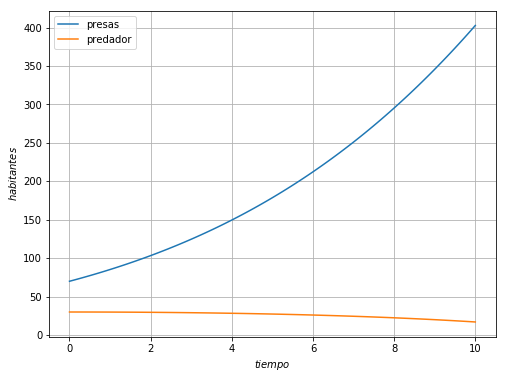

In [5]:
# Gráfico de la solución
plt.figure(figsize=(8,6))
plt.plot(tt,xx, label='presas')
plt.plot(tt,yy, label='predador')
plt.grid()
plt.legend(loc='best')
plt.xlabel('$tiempo$')
plt.ylabel('$habitantes$')

### 2.4 Interpretación

Los depredadores se encuentran disminuyendo mientras que las presas estan creciendo exponencialmente. Es probable que estas especies tengan algun tipo de competencia en los factores y como hay más presas que predadores acaparan los recursos que dejan a los depredadores en decrecimiento.

## P3 VACIADO DE TANQUES
<img style="float: center;" src="./tanques.png" width="1000px" height="750px" />

### 3.1 Modelo matemático
Nos basamos en la siguiente ecuacion
$$\frac{dA}{dt}=r_1 c_1 -r_0 c_0$$
Al tanque $A$ entran $4 l/min$ de una solucion con una concentracion de $2 kg/l$, tambien salen al tanque $B$ $4 l/min$, mientras se salen $ l/min$ por otra llave del tanque $A$. De otra llave entra una solucion al tanque $B$ con una concentracion de $1 kg/l$ con un caudal de $1 l/min$, de este mismo tanque sale hacia el tanque $A$ $1 l/min$, mientras $4 l/min$ salen por otra llave.
$$\frac{dx}{dt}=4\frac{l}{min}*2\frac{kg}{l}+1\frac{l}{min}*\frac{y}{50l}-4\frac{l}{min}*\frac{x}{50l}-1\frac{l}{min}*\frac{x}{50l}$$

$$\frac{dy}{dt}=1\frac{l}{min}*1\frac{kg}{l}+4\frac{l}{min}*\frac{x}{50l}-1\frac{l}{min}*\frac{y}{50l}-4\frac{l}{min}*\frac{y}{50l}$$
Si vamos uniendo terminos:
$$\frac{dx}{dt}=8+\frac{y}{50}-\frac{2}{25}x-\frac{1}{50}x$$
$$\frac{dy}{dt}=1+\frac{2}{25}x-\frac{1}{50}y-\frac{2}{25}y$$
La minima expresion seria:
$$\frac{dx}{dt}=8+\frac{y}{50}-\frac{1}{10}x$$
$$\frac{dy}{dt}=1+\frac{2}{25}x-\frac{1}{10}y$$

### 3.2 Operaciones

In [6]:
# Definimos el campo de la ecuación diferencial
def tanque1(x,y):
    return 8 + (y/50) - (x/10)
def tanque2(x,y):
    return 1 + (2/25)*x  -(y/10)
#condiciones iniciales
fx = 1
fy = 5
# Vector de tiempo
tt = np.linspace(0, 30, 100)
# Solución
xx = odeint(campo1, fx, tt, args=())
yy = odeint(campo2, fy, tt, args=())

### 3.3 Graficas

Text(0, 0.5, '$solucion$')

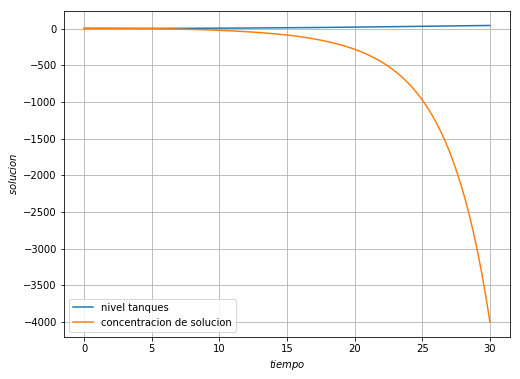

In [7]:
# Gráfico de la solución
plt.figure(figsize=(8,6))
plt.plot(tt,xx, label='nivel tanques')
plt.plot(tt,yy, label='concentracion de solucion')
plt.grid()
plt.legend(loc='best')
plt.xlabel('$tiempo$')
plt.ylabel('$solucion$')

### 3.4 Interpretación
 Por las cantidades que entran y salen podemos saber que el nivel de solucion se mantiene constante en todo momento y la solución se va disolviendo con la mezcla que va entrando.

## P4 CIRCUITO ELECTRICO
### 4.1 Modelo matemático
Nos basamos en el siguiente modelo que ya sabemos que describe el comportamiento de los circuitos:
$$L \frac{di}{dt} + Ri + \frac{1}{c} \int^t_0 i(\tau)d\tau = e(t)$$
las cargas de las mallas quedarian:

malla 1 $\rightarrow e- v_1 -v_2 =0$

malla 2 $\rightarrow - v_3 -v_4 - v_5 -v_6=0$

sustituyendo tendriamos:
$$e -L\frac{dI_1}{dt} - R_2(I_1 -I_2) =0$$
$$-R_2(I_2 -I_1) -L_2\frac{dI_2}{dt} -\frac{1}{C_1} \int^t_0 I_2(\tau)d\tau -R_1(I_2)$$
al hacer un cambio de variables nos quedaria:
$$x_1 = q_1$$
$$x_2 = \dot{q_1}$$
$$x_3 = q_2$$
$$x_4 = \dot{q_2}$$

$$\dot{x_1} = x_2$$
$$\dot{x_2}=\frac{-10cos(60t)+90(x_2-x_4)}{2}$$
$$\dot{x_3} = x_4$$
$$\dot{x_4} = -4x_3- 20x_4 -90(x_4 -x_2)$$


### 4.2 Operaciones

In [ ]:
# Definimos el campo de la ecuación diferencial
def dx1(x1, x2, x3, x4):
    return x2
def dx2(x1, x2, x3, x4, t):
    return (-10*cos(60t)+90(x2-x4))/2
def dx3(x1, x2, x3, x4):
    return x4
def dx4(x1, x2, x3, x4):
    return -4*x3 -20*x4 -90*(x4-x2)
#condiciones iniciales
fx = 0
fy = 0
# Vector de tiempo
tt = np.linspace(0, 1, 100)
# Solución
q1 = odeint(campo1, fx, tt, args=())
q3 = odeint(campo2, fy, tt, args=())

### 4.3 Graficas

### 4.4 Interpretación